<center><h1>DIT244 Project 1<br>(itp22104@hua.gr / Anastasios Kotronis)</h1><center>

## Environment setup

- Add `ipykernel==6.22.0` to `requirements.txt` so that we can change kernel in notebook file
- `>>> python -m venv venv` to create virtual environment with name `venv`
- `>>> .\venv\Scripts\activate.ps1` (Windows Powershell) to activate it
- `>>> python -m pip install --upgrade pip` to upgrade `pip` package manager
- `>>> python -m pip install -r requirements.txt`
- Add kernel to jupyter `>>> python -m ipykernel install --user --name=dit244` (`dit244` will appear in jupyter **Kernel → Change kernel** menu and can be a custom name, not necessarily the same as virtual environment name)

## Φόρτωση Δεδομένων

In [229]:
import os
import sys
import random
from IPython.display import display as dspl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import tensorflow as tf
from tensorflow import keras

sns.set_theme()
%matplotlib inline

Import notebook folder to system path so that we can import `utils`

In [230]:
nb_path = os.path.abspath('')
if nb_path not in sys.path:
    sys.path.append(nb_path)

In [231]:
import utils

In [232]:
X_train, y_train, X_test, y_test = utils.load_dataset("./data/")

print(f'X_train.shape: {X_train.shape}') # shape: (7352, 128, 9)
print(f'y_train.shape: {y_train.shape}') # shape: (7352,)
print(f'X_test.shape: {X_test.shape}') # shape: (2947, 128, 9)
print(f'y_test.shape: {y_test.shape}') # shape: (2947,)

X_train.shape: (7352, 128, 9)
y_train.shape: (7352,)
X_test.shape: (2947, 128, 9)
y_test.shape: (2947,)


In [233]:
# shape: (7352, 1152)
X_train_flat = utils.flatten_X(X_train)
print(f'X_train_flat.shape: {X_train_flat.shape}')

# shape: (2947, 1152)
X_test_flat = utils.flatten_X(X_test)
print(f'X_test_flat.shape: {X_test_flat.shape}')

X_train_flat.shape: (7352, 1152)
X_test_flat.shape: (2947, 1152)


In [234]:
# shape: (7352, 6)
y_train_one_hot = utils.int_to_one_hot(y_train, n_classes=6)
print(f'y_train_one_hot.shape: {y_train_one_hot.shape}')

# shape: (2947, 6)
y_test_one_hot = utils.int_to_one_hot(y_test, n_classes=6)
print(f'y_test_one_hot.shape: {y_test_one_hot.shape}')

y_train_one_hot.shape: (7352, 6)
y_test_one_hot.shape: (2947, 6)


## Επεξεργασία και Ανάλυση Δεδομένων EDA

- ***Βρείτε το πλήθος των εγγραφών της κάθε κλάσης στο σύνολο εκπαίδευσης (<u>training set</u>) και στο σύνολο δοκιμής (<u>test set</u>)***

**Training set**

In [235]:
y_train_series = pd.Series(y_train)
y_train_counts = y_train_series.value_counts().sort_index()
y_train_counts

0    1226
1    1073
2     986
3    1286
4    1374
5    1407
dtype: int64

**Test set**

In [236]:
y_test_series = pd.Series(y_test)
y_test_counts = y_test_series.value_counts().sort_index()
y_test_counts

0    496
1    471
2    420
3    491
4    532
5    537
dtype: int64

- ***Παραξτε το ιστόγραμμα του πλήθους των εγγραφών της κάθε κλάσης. Σχολιάστε τα αποτελέσματα. Θεωρείτε ότι το σύνολο δεδομένων είναι ισορροπημένο (balanced) ή όχι (unbalanced);***

Whole dataset

In [237]:
y_all_data = np.concatenate((y_train, y_test), axis=None)
y_all_counts = pd.Series(y_all_data).value_counts().sort_index()
y_all_counts

0    1722
1    1544
2    1406
3    1777
4    1906
5    1944
dtype: int64

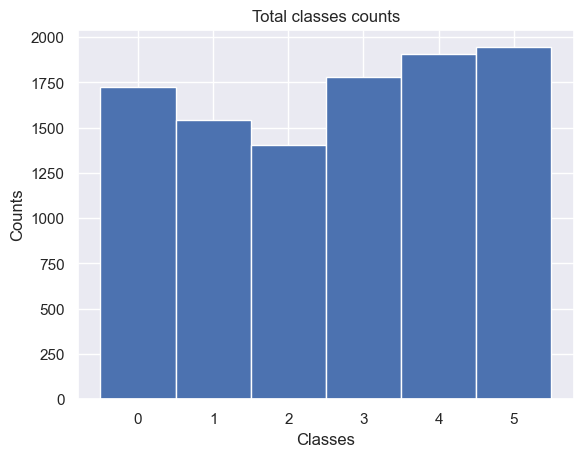

In [238]:
plt.hist(y_all_data, bins=range(max(y_all_data) + 2))
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Total classes counts')
_ = plt.xticks(
    0.5 + pd.Series(range(6)),
    range(6)
)

In percents:

In [239]:
(100 * pd.Series(y_all_data).value_counts(normalize=True).sort_index()).map('{:.1f} %'.format)

0    16.7 %
1    15.0 %
2    13.7 %
3    17.3 %
4    18.5 %
5    18.9 %
dtype: object

And with a multiple bar chart for **Total**, **Training** and **Test** data set

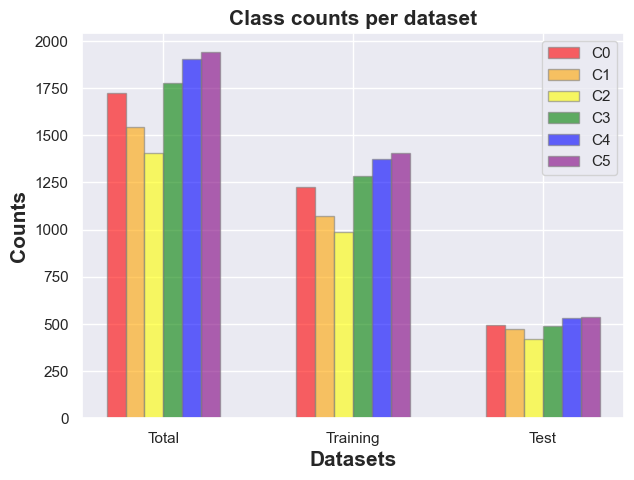

In [240]:
# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize=(7, 5))

# set height of bar
cis = list(zip(y_train_counts + y_test_counts, y_train_counts, y_test_counts))
 
# Set position of bar on X axis
br0 = np.arange(len(cis[0]))
br1 = [x + barWidth for x in br0]
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plot
plt.bar(br0, cis[0], color='red', width=barWidth, edgecolor='grey', label='C0', alpha=0.6)
plt.bar(br1, cis[1], color='orange', width=barWidth, edgecolor='grey', label='C1', alpha=0.6)
plt.bar(br2, cis[2], color='yellow', width=barWidth, edgecolor='grey', label='C2', alpha=0.6)
plt.bar(br3, cis[3], color='green', width=barWidth, edgecolor='grey', label='C3', alpha=0.6)
plt.bar(br4, cis[4], color='blue', width=barWidth, edgecolor='grey', label='C4', alpha=0.6)
plt.bar(br5, cis[5], color='purple', width=barWidth, edgecolor='grey', label='C5', alpha=0.6)
 
# Adding Xticks
plt.xlabel('Datasets', fontweight='bold', fontsize=15)
plt.ylabel('Counts', fontweight='bold', fontsize=15)
plt.title('Class counts per dataset', fontweight='bold', fontsize=15)
plt.xticks(
    [r + 2.5 * barWidth for r in range(len(cis[0]))],
    ['Total', 'Training', 'Test'])
 
_ = plt.legend()

The dataset has a maximum class difference of **5.2%**.

It is not perfectly balanced but maximum difference is not that high so we can't say it is unbalanced

In [241]:
max_diff_prc = 100 * abs(y_all_counts.max() - y_all_counts.min()) / y_all_counts.sum()
print(f'Maximum difference (%): {max_diff_prc:.1f}%')

Maximum difference (%): 5.2%


Features / Activities

In [242]:
############### FEATURES ###############
# 0 - total acc x axis
# 1 - total acc y axis
# 2 - total acc z axis
# 3 - body acc x axis
# 4 - body acc y axis
# 5 - body acc z axis
# 6 - body gyro x axis
# 7 - body gyro y axis
# 8 - body gyro z axis

############## ACTIVITIES ##############
# 0 WALKING
# 1 WALKING_UPSTAIRS
# 2 WALKING_DOWNSTAIRS
# 3 SITTING
# 4 STANDING
# 5 LAYING

In [243]:
features = {
    0: 'total acc x',
    1: 'total acc y',
    2: 'total acc z',
    3: 'body acc x axis',
    4: 'body acc y axis',
    5: 'body acc z axis',
    6: 'body gyro x axis',
    7: 'body gyro y axis',
    8: 'body gyro z axis'
}

In [244]:
activities = {
    0: 'WK',
    1: 'WK-UP',
    2: 'WK-DN',
    3: 'STNG',
    4: 'STND',
    5: 'LNG'
}

Define column lists for the window readings (`128` and `9 * 128` features)

In [245]:
reading_columns = [f'reading{i + 1}' for i in range(128)]
all_features_reading_columns = [f'reading{i + 1}' for i in range(9 * 128)]

- ***Εξάγετε κάποια βασικά στατιστικά για τα σήματα της κάθε κλάσης. Τα στατιστικά θα εξαχθούν στο πρώτο εκ των 9 χαρακτηριστικών (`X_train[:,:,0]`) που είναι η μέτρηση του επιταχυνσιόμετρου κατά τον άξονα x. Συγκεκριμένα, υπολογίστε (α) την μέση τιμή, (β) την μεσαία τιμή, (γ) την τυπική απόκλιση, (δ) την ελάχιστη τιμή και (ε) τη μέγιστη τιμή των σήματων για κάθε κλάση. Σχολιάστε τα αποτελέσματα. Υπάρχει κάποιο label που θα μπορούσαμε να το προβλέπουμε χρησιμοποιώντας μόνο αυτά τα απλά στατιστικά;***

Define a function that converts to dataframe either `X[::i]` (`i`-th feature), or all the features (128*9)

In [246]:
def array_to_df(array_vals_3d, target, feat_idx=None):
    """Convert X[::feat_idx] to df along with target classes and their mapping
       If feat_idx=None, assume all features (128*9)
    """
    columns = reading_columns if feat_idx is not None else all_features_reading_columns
    array_vals_2d = array_vals_3d[:, :, feat_idx] if feat_idx is not None else X_train_flat
    array_vals_2d_with_target = pd.DataFrame(
        data = array_vals_2d,
        columns=columns
    )
    array_vals_2d_with_target['class'] = target.reshape(target.shape[0], 1)
    array_vals_2d_with_target['activity'] = array_vals_2d_with_target['class'].map(activities)
    return array_vals_2d_with_target

We take `i=0`, the forst feature: *total acceleration x*

In [247]:
tot_acc_x_idx = 0

In [248]:
tot_acc_x_train = array_to_df(X_train, y_train, tot_acc_x_idx)
dspl(tot_acc_x_train.head())

,reading1,reading2,reading3,reading4,reading5,reading6,reading7,reading8,reading9,reading10,...,reading121,reading122,reading123,reading124,reading125,reading126,reading127,reading128,class,activity
0,1.012817,1.022833,1.022028,1.017877,1.023680,1.016974,1.017746,1.019263,1.016417,1.020745,...,1.019638,1.020017,1.018766,1.019815,1.019290,1.018445,1.019372,1.021171,4,STND
1,1.018851,1.022380,1.020781,1.020218,1.021344,1.020522,1.019790,1.019216,1.018307,1.017996,...,1.020736,1.020950,1.020491,1.018685,1.015660,1.014788,1.016499,1.017849,4,STND
2,1.023127,1.021882,1.019178,1.015861,1.012893,1.016451,1.020331,1.020266,1.021759,1.018649,...,1.019417,1.019312,1.019448,1.019434,1.019916,1.021041,1.022935,1.022019,4,STND
3,1.017682,1.018149,1.019854,1.019880,1.019121,1.020479,1.020595,1.016340,1.010611,1.009013,...,1.022183,1.021637,1.020598,1.018887,1.019161,1.019916,1.019602,1.020735,4,STND
4,1.019952,1.019616,1.020933,1.023061,1.022242,1.020867,1.021939,1.022300,1.022302,1.022254,...,1.019899,1.017381,1.020389,1.023884,1.021753,1.019425,1.018896,1.016787,4,STND


Define a function that converts the dataframe from wide to long format

In [249]:
def transform_wide_to_long(df):
    """Melt features from columns to rows"""
    
    df['id'] = df.index
    df_trnsf = pd.wide_to_long(
        df,
        stubnames='reading',
        i="id",
        j="_reading"
    ).reset_index(drop=True)
    return df_trnsf

Transform wide to long

In [250]:
tot_acc_x_with_target_trnsf = transform_wide_to_long(tot_acc_x_train)

print(f'tot_acc_x_with_target_trnsf - shape: {tot_acc_x_with_target_trnsf.shape}')
dspl(tot_acc_x_with_target_trnsf.head())

tot_acc_x_with_target_trnsf - shape: (941056, 3)


,activity,class,reading
0,STND,4,1.012817
1,STND,4,1.018851
2,STND,4,1.023127
3,STND,4,1.017682
4,STND,4,1.019952


Define a function that groups by class and calculates the corresponding statistics

In [251]:
def class_stats(df):
    """Compute statistics per class"""
    grouped_per_class = df.groupby('class')
    stats = grouped_per_class.agg(
        count=('reading','count'),
        var_mean=('reading', np.mean),
        var_median=('reading', np.median),
        var_std=('reading', np.std),
        var_min=('reading', np.min),
        var_max=('reading', np.max),
    ).reset_index()

    if 'activity' not in stats.columns:
        stats.insert(1, 'activity', stats['class'].map(activities))
    return stats

In [252]:
stats = class_stats(tot_acc_x_with_target_trnsf)
dspl(stats)

,class,activity,count,var_mean,var_median,var_std,var_min,var_max
0,0,WK,156928,0.995493,0.969672,0.230329,-0.235281,2.045333
1,1,WK-UP,137344,0.949443,0.922418,0.262397,0.095020,2.002134
2,2,WK-DN,126208,0.991595,0.889591,0.377794,-0.207860,2.197618
3,3,STNG,164608,0.950771,0.989222,0.104541,0.427836,1.191525
4,4,STND,175872,1.001449,1.010155,0.025349,0.640800,1.227342
5,5,LNG,180096,0.071710,0.083536,0.141268,-0.466556,0.475669


The 3 **WALKING** classes have almost all the metrics similar which makes it more difficult to distinguish from each other. Only difference appears to be the *min total acceleration on x axis* which is *positive*.

The same holds for **SITTING** and **STANDING** classes. 

**SITTING** and **STANDING** classes could be distinguished from the 3 **WALKING** classes from *max total acceleration on x axis*. 

The **LAYING** labeled signals have signlificantly smaller *mean total acceleration on x axis* and *median total acceleration on x axis* as well as a low *maximum value* compared to the other classes. 
<br>
A signal with corresponding statistics close to the above mentioned could be labeld as **LAYING** with very good chance

- ***Εξάγετε τα ίδια στατιστικά με από πάνω, τώρα όμως πάνω και στα 9 χαρακτηριστικά. Σχολιάστε εκ νέου τα αποτελέσματα***

One thought is to calculate statistics on the *flat* version. However, the 9 features don't have the same unit of measurement, and even although the `README` file mentions "*Features are normalized and bounded within `[-1,1]`*", they are not. (see max value above).

For this case, we first `MinMaxScale` features before calculating statistics:

In [253]:
train_all_features = array_to_df(X_train_flat, y_train)
dspl(train_all_features.head())

,reading1,reading2,reading3,reading4,reading5,reading6,reading7,reading8,reading9,reading10,...,reading1145,reading1146,reading1147,reading1148,reading1149,reading1150,reading1151,reading1152,class,activity
0,1.012817,-0.123217,0.102934,0.000181,0.010767,0.055561,0.030191,0.066014,0.022859,1.022833,...,-0.121326,0.094987,0.001576,0.003070,-0.002270,0.028818,-0.000038,-0.001446,4,STND
1,1.018851,-0.123976,0.097930,0.001094,-0.004688,-0.026860,0.017111,0.006123,0.012268,1.022380,...,-0.130519,0.090612,-0.001599,-0.007192,-0.003397,-0.038650,-0.009440,-0.002798,4,STND
2,1.023127,-0.120016,0.091117,0.003531,0.004456,-0.005915,0.026189,-0.000238,0.002159,1.021882,...,-0.130183,0.081487,0.002178,-0.005442,-0.012784,-0.020235,-0.008831,-0.002645,4,STND
3,1.017682,-0.133404,0.095152,-0.001772,-0.010185,0.001053,-0.037516,-0.012886,-0.000873,1.018149,...,-0.133316,0.081404,-0.000028,-0.001235,-0.004581,-0.007120,0.001951,-0.012987,4,STND
4,1.019952,-0.128731,0.080841,0.000087,-0.003857,-0.013333,-0.019429,-0.008612,-0.001574,1.019616,...,-0.123494,0.088816,-0.003328,0.007404,0.004476,0.015605,0.010797,-0.010082,4,STND


In [254]:
from sklearn.preprocessing import MinMaxScaler

train_all_features_scaled = pd.concat([
    pd.DataFrame(
        MinMaxScaler().fit_transform(train_all_features.iloc[:,:-2]),
        columns=all_features_reading_columns
    ),
    train_all_features.iloc[:,-2:]
], axis='columns')  

Transform wide to long and calculate statistics

In [255]:
train_all_features_scaled_trnsf = transform_wide_to_long(train_all_features_scaled)
stats_all_features_scaled = class_stats(train_all_features_scaled_trnsf)
dspl(stats_all_features_scaled)

,class,activity,count,var_mean,var_median,var_std,var_min,var_max
0,0,WK,1412352,0.520281,0.523468,0.117856,0.000000,1.000000
1,1,WK-UP,1236096,0.509159,0.507776,0.130215,0.000000,1.000000
2,2,WK-DN,1135872,0.521978,0.523591,0.141208,0.000000,1.000000
3,3,STNG,1481472,0.545136,0.551903,0.086377,0.123274,0.980917
4,4,STND,1582848,0.523457,0.536183,0.074826,0.106154,0.848838
5,5,LNG,1620864,0.550782,0.544891,0.199826,0.000000,1.000000


In this case we observe that **LAYING** is distinguished to some extend from the other classes because of *std*, but the difference is not that high.

Another thought is to calculate statistics for each feature separately as we did for `0-th` feature

In [256]:
for i, v in features.items():
    feature_df = array_to_df(X_train, y_train, i)
    feature_df_trnsf = transform_wide_to_long(feature_df)
    stats = class_stats(feature_df_trnsf)
    print(f' {i} - {v} '.center(80, '='))
    dspl(stats)

=============================== 0 - total acc x ================================


,class,activity,count,var_mean,var_median,var_std,var_min,var_max
0,0,WK,156928,0.995493,0.969672,0.230329,-0.235281,2.045333
1,1,WK-UP,137344,0.949443,0.922418,0.262397,0.095020,2.002134
2,2,WK-DN,126208,0.991595,0.889591,0.377794,-0.207860,2.197618
3,3,STNG,164608,0.950771,0.989222,0.104541,0.427836,1.191525
4,4,STND,175872,1.001449,1.010155,0.025349,0.640800,1.227342
5,5,LNG,180096,0.071710,0.083536,0.141268,-0.466556,0.475669


=============================== 1 - total acc y ================================


,class,activity,count,var_mean,var_median,var_std,var_min,var_max
0,0,WK,156928,-0.181541,-0.157551,0.189160,-1.264117,0.517702
1,1,WK-UP,137344,-0.273486,-0.260758,0.199001,-1.387732,0.732500
2,2,WK-DN,126208,-0.148426,-0.118918,0.208970,-1.582079,0.852480
3,3,STNG,164608,0.143306,0.110984,0.187700,-0.342639,0.640836
4,4,STND,175872,-0.163341,-0.166277,0.101326,-0.495457,0.199733
5,5,LNG,180096,0.649551,0.731511,0.317816,-0.581446,1.217350


=============================== 2 - total acc z ================================


,class,activity,count,var_mean,var_median,var_std,var_min,var_max
0,0,WK,156928,-0.069498,-0.052489,0.213152,-1.157209,0.718423
1,1,WK-UP,137344,-0.155278,-0.140640,0.254417,-1.472184,0.646670
2,2,WK-DN,126208,-0.056014,-0.038234,0.224753,-1.639609,0.963272
3,3,STNG,164608,0.154369,0.189528,0.219650,-0.497799,0.702662
4,4,STND,175872,-0.032120,-0.005691,0.159092,-0.489270,0.376032
5,5,LNG,180096,0.560480,0.662114,0.391207,-1.024470,1.281363


============================= 3 - body acc x axis ==============================


,class,activity,count,var_mean,var_median,var_std,var_min,var_max
0,0,WK,156928,-0.000271,-0.029036,0.228926,-1.232238,1.044482
1,1,WK-UP,137344,-0.003224,-0.033718,0.258873,-0.752411,1.010598
2,2,WK-DN,126208,0.002183,-0.103849,0.377718,-1.189048,1.299912
3,3,STNG,164608,-0.000850,-0.000058,0.015156,-0.358091,0.367298
4,4,STND,175872,0.000354,0.000031,0.010478,-0.352722,0.219922
5,5,LNG,180096,-0.001728,-0.000363,0.036015,-1.034877,0.327731


============================= 4 - body acc y axis ==============================


,class,activity,count,var_mean,var_median,var_std,var_min,var_max
0,0,WK,156928,-0.000330,0.024040,0.171478,-0.998189,0.625181
1,1,WK-UP,137344,-0.004988,0.008936,0.176283,-1.073213,0.668864
2,2,WK-DN,126208,0.000403,0.028141,0.190472,-1.345267,0.975976
3,3,STNG,164608,0.002620,0.000470,0.030608,-0.349375,0.708044
4,4,STND,175872,0.000532,-0.000035,0.020997,-0.318108,0.461529
5,5,LNG,180096,-0.000633,-0.000170,0.047566,-0.960711,0.766459


============================= 5 - body acc z axis ==============================


,class,activity,count,var_mean,var_median,var_std,var_min,var_max
0,0,WK,156928,-0.000190,0.002178,0.143785,-0.962916,0.791773
1,1,WK-UP,137344,-0.004002,-0.012788,0.164827,-0.998365,0.986453
2,2,WK-DN,126208,0.000808,0.013833,0.160110,-1.364707,1.066916
3,3,STNG,164608,0.000570,0.000121,0.029101,-0.609868,0.438850
4,4,STND,175872,0.000323,-0.000203,0.023826,-0.604842,0.315331
5,5,LNG,180096,0.000376,0.000187,0.040627,-0.691468,0.722546


============================= 6 - body gyro x axis =============================


,class,activity,count,var_mean,var_median,var_std,var_min,var_max
0,0,WK,156928,-0.003691,0.008100,0.506084,-3.644706,4.155473
1,1,WK-UP,137344,0.050122,0.010278,0.589725,-2.636680,3.518301
2,2,WK-DN,126208,-0.050523,0.015298,0.711870,-4.733656,3.779521
3,3,STNG,164608,-0.010474,-0.000483,0.059806,-1.143103,1.787732
4,4,STND,175872,0.001394,0.000356,0.075598,-0.975582,1.023877
5,5,LNG,180096,0.011256,0.000398,0.092042,-3.536968,2.683967


============================= 7 - body gyro y axis =============================


,class,activity,count,var_mean,var_median,var_std,var_min,var_max
0,0,WK,156928,0.001367,-0.026957,0.554900,-4.477929,4.736424
1,1,WK-UP,137344,-0.010207,-0.040964,0.574647,-3.247274,5.446315
2,2,WK-DN,126208,0.008321,0.004974,0.574565,-5.974330,5.746062
3,3,STNG,164608,0.000694,-0.000090,0.063564,-1.123741,1.525767
4,4,STND,175872,0.003732,0.000239,0.054258,-1.361372,1.480604
5,5,LNG,180096,-0.007821,-0.000334,0.060608,-1.379446,1.264501


============================= 8 - body gyro z axis =============================


,class,activity,count,var_mean,var_median,var_std,var_min,var_max
0,0,WK,156928,-0.000946,0.022869,0.340091,-1.589741,1.665699
1,1,WK-UP,137344,-0.016470,0.011664,0.411390,-2.763014,1.967763
2,2,WK-DN,126208,0.003360,0.010564,0.378100,-2.082775,2.365982
3,3,STNG,164608,-0.003478,0.000782,0.068224,-1.279773,0.749135
4,4,STND,175872,-0.003344,-0.000403,0.038589,-1.329607,0.670473
5,5,LNG,180096,0.018064,0.000042,0.073863,-0.750542,0.946973


By observing the stats for each feature separately we can make similar conclusions as for the `0-th` feature in some cases, for example **LAYING** class distinguishes from others by *mean* and *median* in *total acc y, total acc z*.

Other features seem to give no clear distinction between one class and the others

- ***Διαλέξτε στην τύχη ένα σήμα ανά κλάση (χρησιμοποιήστε πάλι το πρώτο χαρακτηριστικό `X_train[:,:,0]`) και παράξτε τη γραφική του παράσταση. Σχολιάστε τα αποτελέσματα. Τα σήματα σας φαίνονται παρόμοια ή διαφορετικά;***

We define a function `random_signal_per_class` that selects a random signal from each class (using `0-th` feature: `tot_acc_x`) and returns those signals as a `DataFrame`

In [257]:
def random_signal_per_class(df):
    class_values = sorted(df['class'].unique())
    data = {}
    for cls, name in activities.items():
        class_rows = df.loc[df['class'] == cls, reading_columns]
        random_signal_idx = random.randint(0, len(class_rows) - 1)
        data[name] = class_rows.iloc[random_signal_idx,:]
    return pd.DataFrame(data, index=reading_columns)

Select a random signal using the defined function

In [261]:
random_class_signals = random_signal_per_class(tot_acc_x_train)    

Plot the signals from each class

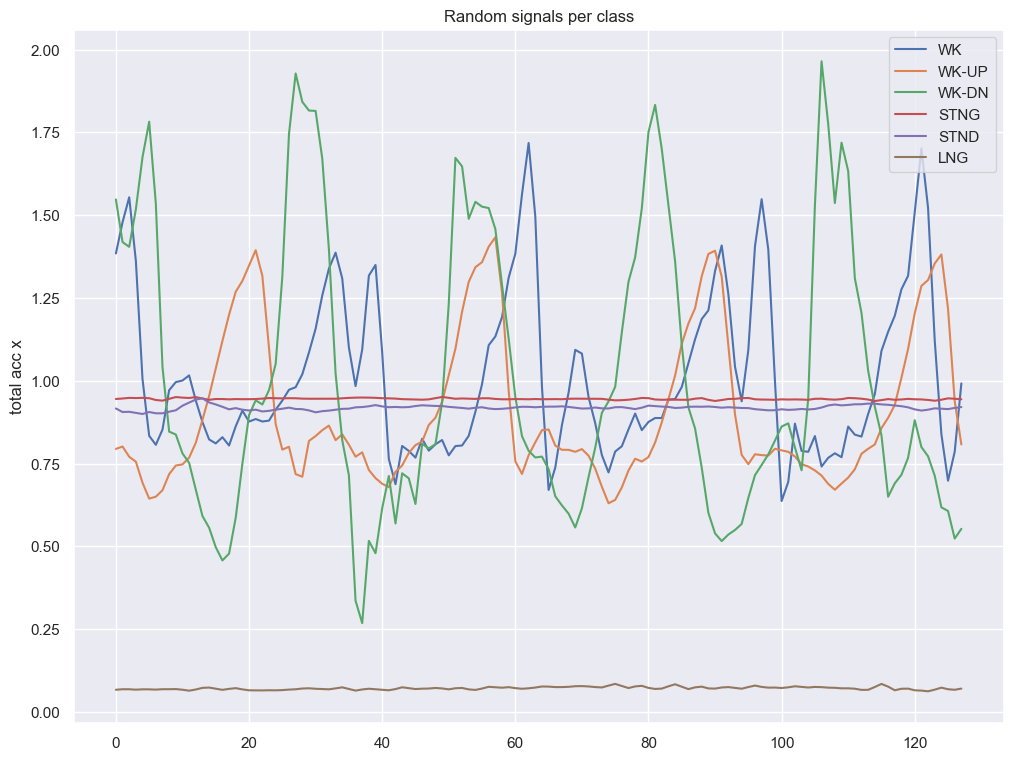

In [262]:
_ = random_class_signals.plot(
    figsize=(12,9),
    use_index=False,
    title='Random signals per class',
    xlabel='Sample',
    ylabel=features[tot_acc_x_idx]
)

**SITTING** and **STANDING** class signals look very similar, something that aggrees with the observation on the statistics above

**LAYING** class signal differs from all the other classes on the significantly smaller values and from the **WALKING** classes on having almost no hign/low peaks.


## Γραμμικό Μοντέλο Πρόβλεψης

### Με χρήση του `scikit-learn`

We use `linear_model.LogisticRegression()` class as model

In [263]:
lr = linear_model.LogisticRegression(penalty='l2', tol=1e-7, solver='lbfgs', max_iter=5000)

`linear_model.LogisticRegression().fit()` [requires `y`](https://github.com/scikit-learn/scikit-learn/blob/9aaed4987/sklearn/linear_model/_logistic.py#L1140) to be of shape `(n_samples,)`, i.e. `(7352,)` in our case, so we can't use directly `y_train_one_hot` as input with this class.

In [264]:
lr.fit(X_train_flat, y_train_one_hot)

ValueError: y should be a 1d array, got an array of shape (7352, 6) instead.

A "workaround" would be to do as below, but this treats the problem as *multilabel* which is not the case:

In [266]:
from sklearn.multioutput import MultiOutputClassifier

clf = MultiOutputClassifier(
    estimator=linear_model.LogisticRegression(
        penalty='l2', tol=1e-7, solver='lbfgs', max_iter=500
    )
)
# clf.fit(X_train_flat, y_train_one_hot)

`linear_model.LogisticRegression()` is [inherently multiclass](https://scikit-learn.org/stable/modules/multiclass.html)

If we don't want to train the model feeding it with a target format that implies *order*, we can directly feed the activity phrases and the model will treat it appropriately  (see also [here](https://stackoverflow.com/a/51532590) and [here](https://datascience.stackexchange.com/a/93258)):

Get the activity phrases from `activities` dict

In [267]:
y_train_input = [activities[x] for x in y_train]
y_test_input = [activities[x] for x in y_test]

Train the model

In [268]:
lr.fit(X_train_flat, y_train_input)

LogisticRegression(max_iter=5000, tol=1e-07)

### Με χρήση του `tensorflow`

We experiment with `softmax`, `relu` and `sigmoid` activation functions and `SGD`, `rmsprop`, and `adam` optimzers

In [269]:
nn1 = keras.Sequential()
nn1.add(
    keras.layers.Dense(
        6,
        # activation='softmax'
        # activation='relu'
        activation='sigmoid'
    )
)

In [270]:
nn1.compile(
    loss='categorical_crossentropy',
    # optimizer=keras.optimizers.SGD(learning_rate=0.01), # epochs ~ 20 (loss: 1.0134 - accuracy: 0.6257)
    # optimizer='rmsprop', # epochs ~ 150 (loss: 0.8312 - accuracy: 0.6979)
    optimizer='adam', # epochs ~ 150 (loss: 0.8238 - accuracy: 0.7016)
    metrics=['accuracy']
)
_ = nn1.fit(X_train_flat, y_train_one_hot, epochs=150, batch_size=32)

Epoch 1/150
230/230 [==============================] - 1s 3ms/step - loss: 1.1859 - accuracy: 0.5345
Epoch 2/150
230/230 [==============================] - 1s 3ms/step - loss: 1.0713 - accuracy: 0.5905
Epoch 3/150
230/230 [==============================] - 1s 3ms/step - loss: 1.0487 - accuracy: 0.6009
Epoch 4/150
230/230 [==============================] - 1s 3ms/step - loss: 1.0408 - accuracy: 0.6085
Epoch 5/150
230/230 [==============================] - 1s 3ms/step - loss: 1.0321 - accuracy: 0.6174
Epoch 6/150
230/230 [==============================] - 1s 3ms/step - loss: 1.0239 - accuracy: 0.6167
Epoch 7/150
230/230 [==============================] - 1s 3ms/step - loss: 1.0169 - accuracy: 0.6261
Epoch 8/150
230/230 [==============================] - 1s 3ms/step - loss: 1.0096 - accuracy: 0.6370
Epoch 9/150
230/230 [==============================] - 1s 3ms/step - loss: 1.0035 - accuracy: 0.6351
Epoch 10/150
230/230 [==============================] - 1s 3ms/step - loss: 0.9991 - accura

230/230 [==============================] - 1s 3ms/step - loss: 0.8481 - accuracy: 0.6957
Epoch 82/150
230/230 [==============================] - 1s 3ms/step - loss: 0.8495 - accuracy: 0.6793
Epoch 83/150
230/230 [==============================] - 1s 3ms/step - loss: 0.8479 - accuracy: 0.6910
Epoch 84/150
230/230 [==============================] - 1s 3ms/step - loss: 0.8482 - accuracy: 0.6834
Epoch 85/150
230/230 [==============================] - 1s 3ms/step - loss: 0.8479 - accuracy: 0.6865
Epoch 86/150
230/230 [==============================] - 1s 3ms/step - loss: 0.8453 - accuracy: 0.6850
Epoch 87/150
230/230 [==============================] - 1s 3ms/step - loss: 0.8465 - accuracy: 0.6878
Epoch 88/150
230/230 [==============================] - 1s 3ms/step - loss: 0.8443 - accuracy: 0.6925
Epoch 89/150
230/230 [==============================] - 1s 2ms/step - loss: 0.8444 - accuracy: 0.6922
Epoch 90/150
230/230 [==============================] - 1s 3ms/step - loss: 0.8444 - accuracy: 

Print model layers

In [271]:
nn1.layers

Print model summary

In [272]:
nn1.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 6)                 6918      
                                                                 
Total params: 6,918
Trainable params: 6,918
Non-trainable params: 0
_________________________________________________________________


### Αξιολόγηση του μοντέλου

For the model evaluation we define two functions:
- `clf_report_do_df` to convert the classification report string to a `DataFrame` for display purposes and
- `performance` to plot the confusion matrix and generate the classification report

In [273]:
def clf_report_do_df(txt):
    """Convert claassification report to DataFrame"""
    
    txt = txt.strip().replace('\n\n', '\n')
    txt = [ln.strip() for ln in txt.split('\n')]
    lines = []
    for ln in txt:
        if ln.startswith('accuracy'):
            line = ln.split()
            line.insert(1,'')
            line.insert(1,'')
        elif ln.startswith('precision'):
            line = ln.split()
            line.insert(0,'classes/agg')
        elif 'avg' in ln:
            line = ln.replace(' avg','-avg').split()
        else:
            line = ln.split()
        lines.append(line)
    
    return pd.DataFrame(data=lines[1:], columns=lines[0]).set_index('classes/agg')

In [274]:
def performance(model, X_test, y_test, digits=5):
    """Plot confusion matrix and return classifiction report as DataFrame"""
    import sklearn.metrics as metrics
    
    y_pred = model.predict(X_test)
    target_names = getattr(model, 'classes_', None)
    if target_names is None:
        # NN model case
        target_names = sorted(list(activities.values()))
        y_test = [activities[x] for x in np.argmax(y_test, axis=1)]
        y_pred = [activities[x] for x in np.argmax(y_pred, axis=1)]
    
    # Classification report
    report = metrics.classification_report(
        y_test,
        y_pred,
        target_names=target_names,
        digits=digits
    )

     # Confusion Matrix
    fig, ax = plt.subplots(figsize=(6,4))
    ax.grid(False)
    cm = metrics.confusion_matrix(y_test, y_pred)
    cmp = metrics.ConfusionMatrixDisplay(cm, display_labels=target_names)
    cmp.plot(ax=ax, xticks_rotation=45)
    plt.show()
    
    # Return report DataFrame
    return clf_report_do_df(report)

#### `scikit-learn` case

Evaluate the `LogisticRegression` model on **train** dataset

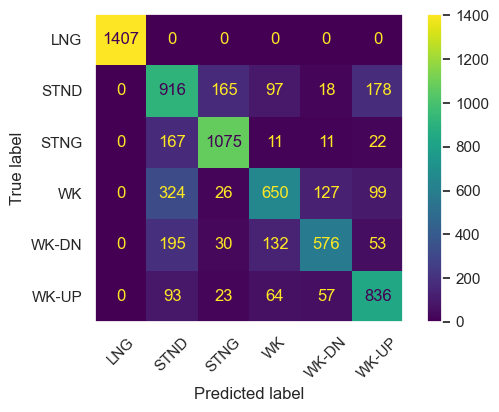

In [275]:
clf_report_to_df_lr_train = performance(lr, X_train_flat, y_train_input, digits=5)

In [276]:
clf_report_to_df_lr_train

,precision,recall,f1-score,support
classes/agg,,,,
LNG,1.00000,1.00000,1.00000,1407
STND,0.54041,0.66667,0.59694,1374
STNG,0.81501,0.83593,0.82534,1286
WK,0.68134,0.53018,0.59633,1226
WK-DN,0.73004,0.58418,0.64901,986
WK-UP,0.70370,0.77912,0.73950,1073
accuracy,,,0.74266,7352
macro-avg,0.74508,0.73268,0.73452,7352
weighted-avg,0.74916,0.74266,0.74171,7352


Evaluate the `LogisticRegression` model on **test** dataset

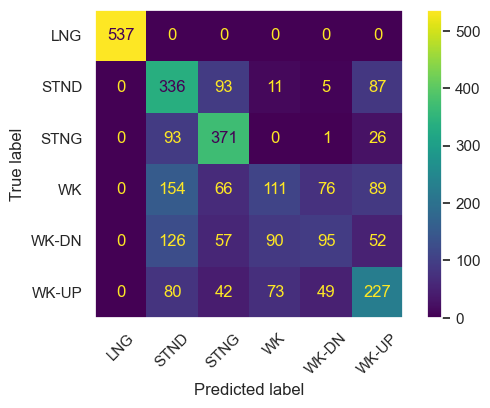

In [278]:
clf_report_to_df_lr_test = performance(lr, X_test_flat, y_test_input, digits=5)

In [279]:
clf_report_to_df_lr_test

,precision,recall,f1-score,support
classes/agg,,,,
LNG,1.00000,1.00000,1.00000,537
STND,0.42586,0.63158,0.50871,532
STNG,0.58983,0.75560,0.66250,491
WK,0.38947,0.22379,0.28425,496
WK-DN,0.42035,0.22619,0.29412,420
WK-UP,0.47193,0.48195,0.47689,471
accuracy,,,0.56905,2947
macro-avg,0.54957,0.55319,0.53774,2947
weighted-avg,0.55825,0.56905,0.55041,2947


#### `tensorflow` case

Evaluate the `NN` model on **train** dataset

230/230 [==============================] - 1s 2ms/step


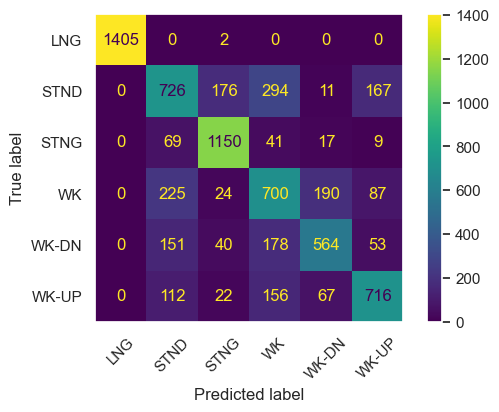

In [280]:
clf_report_to_df_nn1_train = performance(nn1, X_train_flat, y_train_one_hot, digits=5)

In [281]:
clf_report_to_df_nn1_train

,precision,recall,f1-score,support
classes/agg,,,,
LNG,1.00000,0.99858,0.99929,1407
STND,0.56586,0.52838,0.54648,1374
STNG,0.81330,0.89425,0.85185,1286
WK,0.51132,0.57096,0.53950,1226
WK-DN,0.66431,0.57201,0.61471,986
WK-UP,0.69380,0.66729,0.68029,1073
accuracy,,,0.71559,7352
macro-avg,0.70810,0.70524,0.70535,7352
weighted-avg,0.71501,0.71559,0.71407,7352


Evaluate the `NN` model on **test** dataset

93/93 [==============================] - 0s 2ms/step


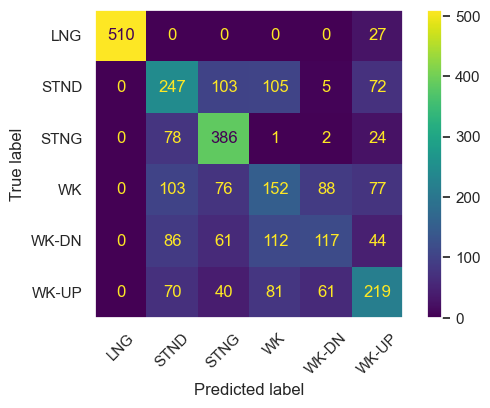

In [282]:
clf_report_to_df_nn1_test = performance(nn1, X_test_flat, y_test_one_hot, digits=5)

In [283]:
clf_report_to_df_nn1_test

,precision,recall,f1-score,support
classes/agg,,,,
LNG,1.00000,0.94972,0.97421,537
STND,0.42295,0.46429,0.44265,532
STNG,0.57958,0.78615,0.66724,491
WK,0.33703,0.30645,0.32101,496
WK-DN,0.42857,0.27857,0.33766,420
WK-UP,0.47300,0.46497,0.46895,471
accuracy,,,0.55344,2947
macro-avg,0.54019,0.54169,0.53529,2947
weighted-avg,0.54853,0.55344,0.54570,2947


***Με βάση τα παραπάνω αποτελέσματα, απαντήστε στις παρακάτω τρεις ερωτήσεις:***

- ***Ποια η πιθανότητα το μοντέλο να είναι εύστοχο σε μια τυχαία μελλοντική πρόβλεψη;***

`LogisticRegression` model

In [284]:
print(f"Accuracy: {float(clf_report_to_df_lr_test.loc['accuracy', clf_report_to_df_lr_test.columns[2]])}")

Accuracy: 0.56905


`NN` model

In [285]:
print(f"Accuracy: {float(clf_report_to_df_nn1_test.loc['accuracy', clf_report_to_df_nn1_test.columns[2]])}")

Accuracy: 0.55344


- ***Αν το μοντέλο προέβλεψε για κάποιον χρήστη ότι περπατάει, ποια η πιθανότητα να είναι εύστοχη η πρόβλεψη;***

From [Conditional probability](https://en.wikipedia.org/wiki/Conditional_probability) and [Law of total probability](https://en.wikipedia.org/wiki/Law_of_total_probability):

$\displaystyle{\mathrm{P(A|B)}=\frac{\mathrm{P(A\cap B)}}{\mathrm{P(B)}}=\frac{\mathrm{P(A\cap B)}}{\mathrm{P(B|A)P(A)+P(B|\neg A)P(\neg A)}}=\frac{\mathrm{P(A\cap B)}}{\mathrm{P(B\cap A)+P(B\cap\neg A)}}}$

With $\mathrm{A:=Actualy\;WK}, \quad \mathrm{B:=Predict\;WK},\;$ we have $\displaystyle{\mathrm{P(A|B)}=\frac{\mathrm{TP}}{\mathrm{TP+FP}}=\mathrm{precision}}$

`LogisticRegression` model

In [286]:
print(f"Precision: {float(clf_report_to_df_lr_test.loc['WK', 'precision'])}")

Precision: 0.38947


`NN` model

In [287]:
print(f"Precision: {float(clf_report_to_df_nn1_test.loc['WK', 'precision'])}")

Precision: 0.33703


- ***Αν περπατάω, ποια η πιθανότητα να δω την ένδειξη ”περπάτημα” αν κοιτάξω το ρολόι; (εναλλακτικά: αν περπατάω, ποια η πιθανότητα το μοντέλο να έχει προβλέψει σωστά);***

As above:

$\displaystyle{\mathrm{P(A|B)}=\frac{\mathrm{P(A\cap B)}}{\mathrm{P(B)}}=\frac{\mathrm{P(A\cap B)}}{\mathrm{P(B|A)P(A)+P(B|\neg A)P(\neg A)}}=\frac{\mathrm{P(A\cap B)}}{\mathrm{P(B\cap A)+P(B\cap\neg A)}}}$

Changing $\mathrm{A}$ and $\mathrm{B}$, i.e.: $\mathrm{A:=Predict\;WK}, \quad \mathrm{B:=Actualy\;WK},\;$ we have $\displaystyle{\mathrm{P(A|B)}=\frac{\mathrm{TP}}{\mathrm{TP+FN}}=\mathrm{recall}}$

`LogisticRegression` model

In [288]:
print(f"Recall: {float(clf_report_to_df_lr_test.loc['WK', 'recall'])}")

Recall: 0.22379


`NN` model

In [289]:
print(f"Recall: {float(clf_report_to_df_nn1_test.loc['WK', 'recall'])}")

Recall: 0.30645


## Πλήρως συνδεδεμένο νευρωνικό δίκτυο

We experiment with `softmax`, `relu` and `sigmoid` activation functions and `SGD`, `rmsprop`, and `adam` optimizers.

We also add `Droppout` layers to avoid overfitting and `Earlystopping` callback to stop training if there is no improvement.

In [290]:
nn2 = keras.Sequential()
nn2.add(
    keras.layers.Dense(
        30,
        activation='relu'
    )
)
# Turn off ..% of neurons randomly to avoid overfitting
nn2.add(keras.layers.Dropout(0.5))
nn2.add(
    keras.layers.Dense(
        15,
        activation='relu'
        # activation='sigmoid'
    )
)
# Turn off ...% of neurons randomly to avoid overfitting
nn2.add(keras.layers.Dropout(0.5))
nn2.add(
    keras.layers.Dense(
        6,
        activation='softmax'
    )
)

In [291]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    # Metric to monitor
    monitor='val_loss',
    # What to do with the metric
    mode='min',
    # Stop after epochs with no improvement
    patience=10
)

In [292]:
nn2.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=0.01), # epochs ~ 
    # optimizer='rmsprop', # epochs ~ 
    # optimizer='adam', # epochs ~ 
    metrics=['accuracy']
)
_ = nn2.fit(
    X_train_flat,
    y_train_one_hot,
    epochs=500,
    batch_size=32,
    callbacks=[early_stop],
    validation_data=(X_train_flat, y_train_one_hot)
)

Epoch 1/500
230/230 [==============================] - 2s 7ms/step - loss: 1.6400 - accuracy: 0.2919 - val_loss: 1.3823 - val_accuracy: 0.5971
Epoch 2/500
230/230 [==============================] - 2s 7ms/step - loss: 1.5029 - accuracy: 0.3724 - val_loss: 1.3192 - val_accuracy: 0.6170
Epoch 3/500
230/230 [==============================] - 2s 7ms/step - loss: 1.4286 - accuracy: 0.4085 - val_loss: 1.2546 - val_accuracy: 0.6752
Epoch 4/500
230/230 [==============================] - 2s 7ms/step - loss: 1.3733 - accuracy: 0.4291 - val_loss: 1.1707 - val_accuracy: 0.6892
Epoch 5/500
230/230 [==============================] - 2s 7ms/step - loss: 1.3071 - accuracy: 0.4627 - val_loss: 1.1058 - val_accuracy: 0.7212
Epoch 6/500
230/230 [==============================] - 2s 7ms/step - loss: 1.2590 - accuracy: 0.4878 - val_loss: 1.0617 - val_accuracy: 0.7341
Epoch 7/500
230/230 [==============================] - 2s 7ms/step - loss: 1.2189 - accuracy: 0.5065 - val_loss: 1.0181 - val_accuracy: 0.7618

Epoch 58/500
230/230 [==============================] - 1s 6ms/step - loss: 0.7342 - accuracy: 0.6984 - val_loss: 0.4360 - val_accuracy: 0.8984
Epoch 59/500
230/230 [==============================] - 2s 7ms/step - loss: 0.7323 - accuracy: 0.6995 - val_loss: 0.4349 - val_accuracy: 0.8957
Epoch 60/500
230/230 [==============================] - 2s 7ms/step - loss: 0.7293 - accuracy: 0.6999 - val_loss: 0.4225 - val_accuracy: 0.9067
Epoch 61/500
230/230 [==============================] - 1s 6ms/step - loss: 0.7368 - accuracy: 0.6933 - val_loss: 0.4364 - val_accuracy: 0.8979
Epoch 62/500
230/230 [==============================] - 1s 6ms/step - loss: 0.7396 - accuracy: 0.6918 - val_loss: 0.4369 - val_accuracy: 0.8901
Epoch 63/500
230/230 [==============================] - 2s 7ms/step - loss: 0.7386 - accuracy: 0.6948 - val_loss: 0.4139 - val_accuracy: 0.9124
Epoch 64/500
230/230 [==============================] - 1s 6ms/step - loss: 0.7333 - accuracy: 0.6999 - val_loss: 0.4361 - val_accuracy:

Epoch 115/500
230/230 [==============================] - 2s 7ms/step - loss: 0.6312 - accuracy: 0.7470 - val_loss: 0.3254 - val_accuracy: 0.9158
Epoch 116/500
230/230 [==============================] - 1s 6ms/step - loss: 0.6257 - accuracy: 0.7558 - val_loss: 0.3137 - val_accuracy: 0.9241
Epoch 117/500
230/230 [==============================] - 1s 6ms/step - loss: 0.6308 - accuracy: 0.7546 - val_loss: 0.3175 - val_accuracy: 0.9188
Epoch 118/500
230/230 [==============================] - 2s 7ms/step - loss: 0.6359 - accuracy: 0.7531 - val_loss: 0.3117 - val_accuracy: 0.9264
Epoch 119/500
230/230 [==============================] - 1s 6ms/step - loss: 0.6411 - accuracy: 0.7503 - val_loss: 0.3149 - val_accuracy: 0.9313
Epoch 120/500
230/230 [==============================] - 2s 7ms/step - loss: 0.6256 - accuracy: 0.7529 - val_loss: 0.3137 - val_accuracy: 0.9232
Epoch 121/500
230/230 [==============================] - 2s 7ms/step - loss: 0.6247 - accuracy: 0.7613 - val_loss: 0.3116 - val_ac

230/230 [==============================] - 2s 7ms/step - loss: 0.5849 - accuracy: 0.7711 - val_loss: 0.2747 - val_accuracy: 0.9310
Epoch 172/500
230/230 [==============================] - 2s 7ms/step - loss: 0.5809 - accuracy: 0.7716 - val_loss: 0.2758 - val_accuracy: 0.9271
Epoch 173/500
230/230 [==============================] - 2s 7ms/step - loss: 0.5882 - accuracy: 0.7716 - val_loss: 0.2688 - val_accuracy: 0.9373
Epoch 174/500
230/230 [==============================] - 2s 7ms/step - loss: 0.5851 - accuracy: 0.7684 - val_loss: 0.2646 - val_accuracy: 0.9335
Epoch 175/500
230/230 [==============================] - 1s 6ms/step - loss: 0.5706 - accuracy: 0.7748 - val_loss: 0.2687 - val_accuracy: 0.9339
Epoch 176/500
230/230 [==============================] - 2s 8ms/step - loss: 0.5827 - accuracy: 0.7733 - val_loss: 0.2688 - val_accuracy: 0.9321
Epoch 177/500
230/230 [==============================] - 2s 7ms/step - loss: 0.5685 - accuracy: 0.7841 - val_loss: 0.2649 - val_accuracy: 0.9339

Plot **train** vs **validation** loss

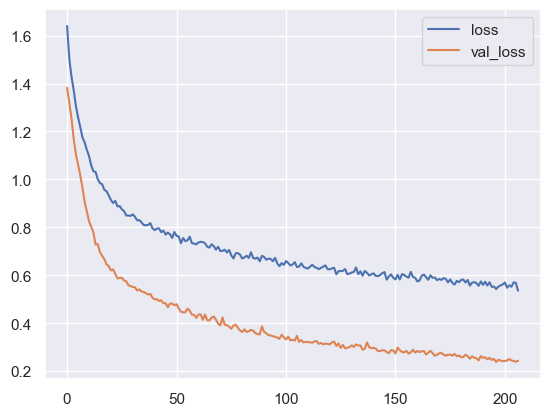

In [293]:
_ = pd.DataFrame(nn2.history.history)[['loss', 'val_loss']].plot()

We don't observe divergence, so this is a sign we didn't overfit

Evaluate the `NN` model on **train** dataset

230/230 [==============================] - 1s 3ms/step


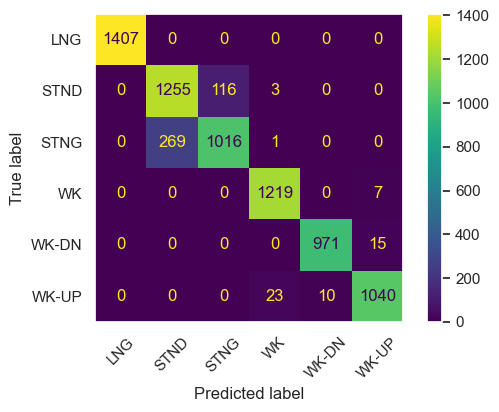

In [294]:
clf_report_to_df_nn2_train = performance(nn2, X_train_flat, y_train_one_hot, digits=5)

In [295]:
clf_report_to_df_nn2_train

,precision,recall,f1-score,support
classes/agg,,,,
LNG,1.00000,1.00000,1.00000,1407
STND,0.82349,0.91339,0.86611,1374
STNG,0.89753,0.79005,0.84036,1286
WK,0.97833,0.99429,0.98625,1226
WK-DN,0.98981,0.98479,0.98729,986
WK-UP,0.97928,0.96925,0.97424,1073
accuracy,,,0.93961,7352
macro-avg,0.94474,0.94196,0.94238,7352
weighted-avg,0.94108,0.93961,0.93930,7352


Evaluate the `NN` model on **test** dataset

93/93 [==============================] - 0s 2ms/step


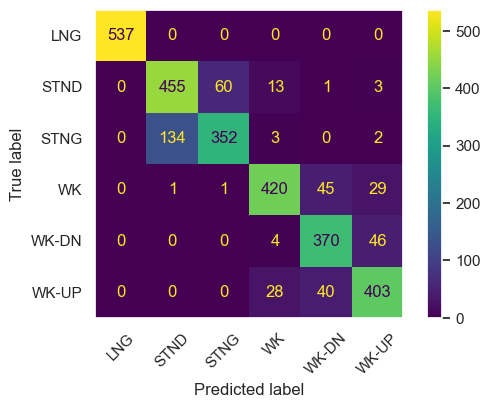

In [296]:
clf_report_to_df_nn2_test = performance(nn2, X_test_flat, y_test_one_hot, digits=5)

In [297]:
clf_report_to_df_nn2_test

,precision,recall,f1-score,support
classes/agg,,,,
LNG,1.00000,1.00000,1.00000,537
STND,0.77119,0.85526,0.81105,532
STNG,0.85230,0.71690,0.77876,491
WK,0.89744,0.84677,0.87137,496
WK-DN,0.81140,0.88095,0.84475,420
WK-UP,0.83437,0.85563,0.84486,471
accuracy,,,0.86088,2947
macro-avg,0.86112,0.85925,0.85847,2947
weighted-avg,0.86347,0.86088,0.86046,2947


## Συνελικτικό νευρωνικό δίκτυο

In [191]:
n_timesteps, n_features = X_train.shape[1:]
n_outputs = y_train_one_hot.shape[1]
kernel_size_1, kernel_size_2 = 3, 5

print(n_timesteps, n_features, n_outputs)

128 9 6


In [192]:
nn3 = keras.Sequential()
nn3.add(
    keras.layers.Conv1D(
        filters=64,
        kernel_size=kernel_size_1,
        activation='relu',
        input_shape=(n_timesteps, n_features)
    )
)
nn3.add(
    keras.layers.Conv1D(
        filters=64,
        kernel_size=kernel_size_2,
        activation='relu'
    )
)

# Turn off ...% of neurons randomly to avoid overfitting
nn3.add(keras.layers.Dropout(0.5))

# Downsample the input representation
nn3.add(keras.layers.MaxPooling1D(pool_size=2))

# Convert multi-dimensional arrays into flattened ones.
# Commonly used in the transition from the convolution layer to the full connected layer
nn3.add(keras.layers.Flatten())

# Fully connected layer
nn3.add(
    keras.layers.Dense(
        100,
        activation='relu'
    )
)
nn3.add(
    keras.layers.Dense(
        n_outputs,
        activation='softmax'
    )
)

We expriment with `SGD` and `Adam` optimizers end examine results

In [193]:
nn3.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    # optimizer='adam',
    metrics=['accuracy']
)

In [194]:
_ = nn3.fit(X_train, y_train_one_hot, epochs=10, batch_size=32)

Epoch 1/10
230/230 [==============================] - 6s 24ms/step - loss: 0.9662 - accuracy: 0.6307
Epoch 2/10
230/230 [==============================] - 6s 24ms/step - loss: 0.5464 - accuracy: 0.7749
Epoch 3/10
230/230 [==============================] - 6s 24ms/step - loss: 0.4548 - accuracy: 0.8153
Epoch 4/10
230/230 [==============================] - 5s 24ms/step - loss: 0.3692 - accuracy: 0.8591
Epoch 5/10
230/230 [==============================] - 6s 25ms/step - loss: 0.3191 - accuracy: 0.8768
Epoch 6/10
230/230 [==============================] - 6s 25ms/step - loss: 0.2671 - accuracy: 0.9040
Epoch 7/10
230/230 [==============================] - 6s 25ms/step - loss: 0.2279 - accuracy: 0.9184
Epoch 8/10
230/230 [==============================] - 6s 25ms/step - loss: 0.2019 - accuracy: 0.9248
Epoch 9/10
230/230 [==============================] - 6s 24ms/step - loss: 0.1825 - accuracy: 0.9327
Epoch 10/10
230/230 [==============================] - 5s 23ms/step - loss: 0.1727 - accura

Evaluate the `NN` model on **train** dataset

230/230 [==============================] - 2s 10ms/step


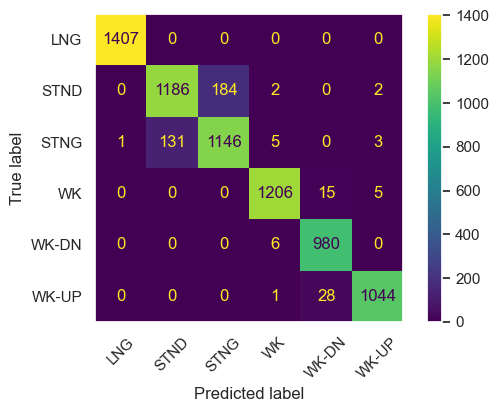

In [195]:
clf_report_to_df_nn3_train = performance(nn3, X_train, y_train_one_hot, digits=5)

In [196]:
clf_report_to_df_nn3_train

,precision,recall,f1-score,support
classes/agg,,,,
LNG,0.99929,1.00000,0.99964,1407
STND,0.90053,0.86317,0.88146,1374
STNG,0.86165,0.89114,0.87615,1286
WK,0.98852,0.98369,0.98610,1226
WK-DN,0.95797,0.99391,0.97561,986
WK-UP,0.99051,0.97297,0.98166,1073
accuracy,,,0.94791,7352
macro-avg,0.94975,0.95081,0.95010,7352
weighted-avg,0.94814,0.94791,0.94785,7352


Evaluate the `NN` model on **test** dataset

93/93 [==============================] - 1s 9ms/step


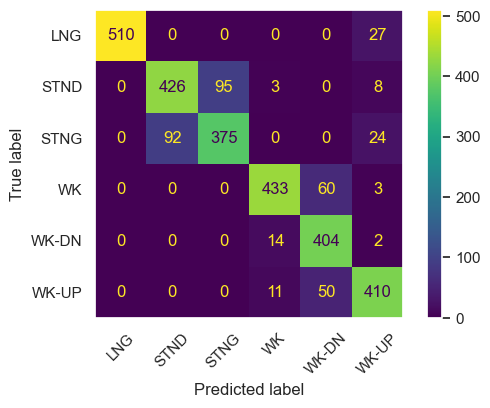

In [197]:
clf_report_to_df_nn3_test = performance(nn3, X_test, y_test_one_hot, digits=5)

In [190]:
clf_report_to_df_nn3_test

,precision,recall,f1-score,support
classes/agg,,,,
LNG,1.00000,0.94972,0.97421,537
STND,0.83993,0.91729,0.87691,532
STNG,0.89398,0.75560,0.81898,491
WK,0.98913,0.91734,0.95188,496
WK-DN,0.90498,0.95238,0.92807,420
WK-UP,0.82931,0.94904,0.88515,471
accuracy,,,0.90635,2947
macro-avg,0.90955,0.90690,0.90587,2947
weighted-avg,0.91079,0.90635,0.90622,2947


## Random Forest

In [486]:
from sklearn.ensemble import RandomForestClassifier

Define performance metrics to search best model based on one of these

In [510]:
metrics = [
    'accuracy',
    'precision_macro',
    'recall_macro',
    'f1_macro'
]

Choose a metric

In [511]:
metric = metrics[0]

In [489]:
rf = RandomForestClassifier()

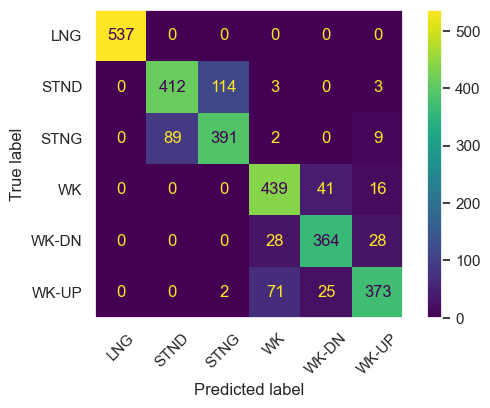

,precision,recall,f1-score,support
classes/agg,,,,
LNG,1.00000,1.00000,1.00000,537
STND,0.82236,0.77444,0.79768,532
STNG,0.77120,0.79633,0.78357,491
WK,0.80847,0.88508,0.84504,496
WK-DN,0.84651,0.86667,0.85647,420
WK-UP,0.86946,0.79193,0.82889,471
accuracy,,,0.85375,2947
macro-avg,0.85300,0.85241,0.85194,2947
weighted-avg,0.85484,0.85375,0.85353,2947


Execution time - Total: 0:00:45


In [497]:
import time
start_time = time.time()
########################################################
rf.fit(X_train_flat, y_train_input)
########################################################
m, s = divmod(time.time() - start_time, 60)
h, m = divmod(m, 60)
print("Execution time - Total: %d:%02d:%02d" % (h, m, s))

Performance on **train** dataset

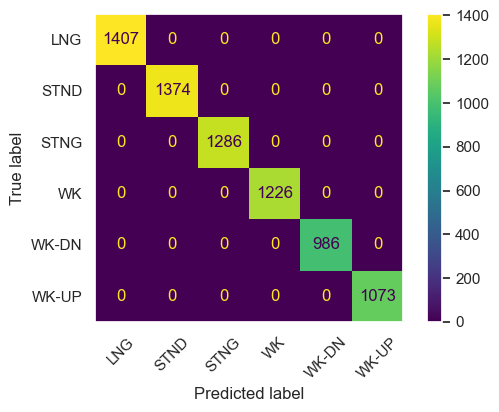

,precision,recall,f1-score,support
classes/agg,,,,
LNG,1.00000,1.00000,1.00000,1407
STND,1.00000,1.00000,1.00000,1374
STNG,1.00000,1.00000,1.00000,1286
WK,1.00000,1.00000,1.00000,1226
WK-DN,1.00000,1.00000,1.00000,986
WK-UP,1.00000,1.00000,1.00000,1073
accuracy,,,1.00000,7352
macro-avg,1.00000,1.00000,1.00000,7352
weighted-avg,1.00000,1.00000,1.00000,7352


In [499]:
rf_report_to_df = performance(rf, X_train_flat, y_train_input, digits=5)
dspl(rf_report_to_df)

Performance on **test** dataset

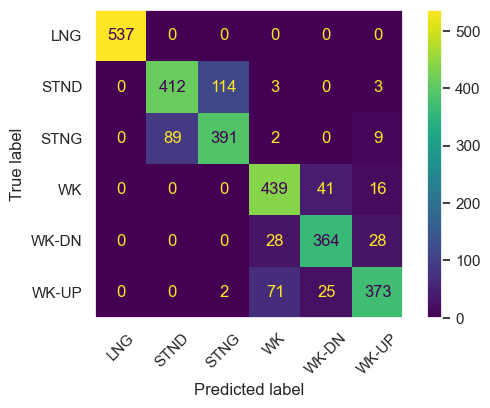

,precision,recall,f1-score,support
classes/agg,,,,
LNG,1.00000,1.00000,1.00000,537
STND,0.82236,0.77444,0.79768,532
STNG,0.77120,0.79633,0.78357,491
WK,0.80847,0.88508,0.84504,496
WK-DN,0.84651,0.86667,0.85647,420
WK-UP,0.86946,0.79193,0.82889,471
accuracy,,,0.85375,2947
macro-avg,0.85300,0.85241,0.85194,2947
weighted-avg,0.85484,0.85375,0.85353,2947


In [500]:
rf_report_to_df = performance(rf, X_test_flat, y_test_input, digits=5)
dspl(rf_report_to_df)

### Hyperparameter tuning

Find best model: **Hyperparameter tuning** and **cross validation** with `GridSearchCV`/`RandomizedSearchCV`

We use **train** data on `GridSearchCV`/`RandomizedSearchCV` and perform **5-fold** cross validation along with parameter tuning to find best model

Define a function to do this that accepts as input the model, the corresponding parameters and a metric to evaluate upon

In [516]:
def fine_tune(model, param_grid, metric, X_train, y_train, n_splits=5):
    from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
    from sklearn.model_selection import StratifiedKFold
    
    # By default uses stratified sampling for binary/multiclass
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    # but anyway we use StratifiedKFold
    splits = StratifiedKFold(n_splits=n_splits)
#     grid = GridSearchCV(
#         model,
#         param_grid,
#         cv=splits,
#         n_jobs=-1,
#         scoring=metric,
#         return_train_score=True,
#     )
    grid = RandomizedSearchCV(
        model,
        param_grid,
        n_iter=10,
        cv=splits,
        n_jobs=-1,
        scoring=metric,
        return_train_score=True,
    )
    grid.fit(X_train, y_train)
    return grid

Define a function to plot and return results of hyperparameter tuning

In [547]:
def fine_tune_report(result_grid, plot_param=None):
    '''Accepts the gridsearch result and a parameter to plot for train-test score
        Return tuple with best estimator and results as dataframe
    '''
    df = pd.DataFrame(result_grid.cv_results_)
    df_return = df.copy()
    if plot_param:
        plot_param_title = ' '.join([x.title() for x in plot_param.split('_')])
        df = df[[f"param_{plot_param}" , 'mean_train_score', 'mean_test_score']]
        df = df.rename(columns={'mean_test_score':'Test','mean_train_score':'Train', f"param_{plot_param}":plot_param_title})
        df = df.groupby(plot_param_title).mean()
        _ = df.plot(kind='line', grid=True, ylabel='Mean Score')
    return {'best_estimator':result_grid.best_estimator_, 'results_df':df_return}

Define hyperparameters

To avoid overfitting we test on different parameters for **ccp_alpha** (pruning) and **max_depth** (see [here](https://towardsdatascience.com/3-techniques-to-avoid-overfitting-of-decision-trees-1e7d3d985a09))

In [548]:
max_depth = range(1, 41, 5)
criteria = ['gini'] # 'entropy'
_start, _end = 0.0001, 0.001
_step = _start
ccp_alpha = np.arange(_start, _end, _step)
param_grid = {
    'max_depth':max_depth,
    'criterion':criteria,
    'ccp_alpha':ccp_alpha,
}

In [550]:
import time
start_time = time.time()
########################################################

result_rf = fine_tune(rf, param_grid, metric, X_train_flat, y_train_input)

########################################################
m, s = divmod(time.time() - start_time, 60)
h, m = divmod(m, 60)
print("Execution time - Total: %d:%02d:%02d" % (h, m, s))

Execution time - Total: 0:04:26


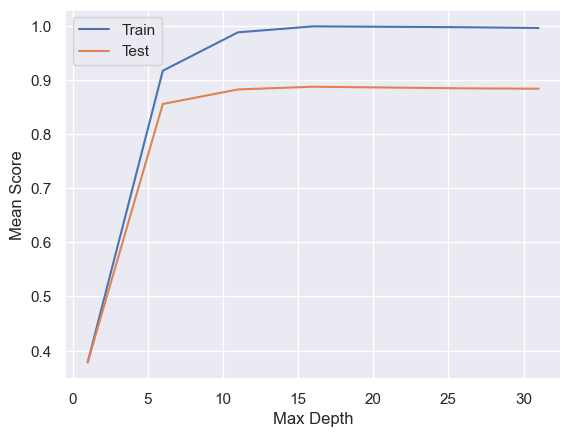

In [551]:
report = fine_tune_report(result_rf, 'max_depth')

Best estimator's parameters

In [552]:
best_estimator = report['best_estimator']
best_estimator.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0005,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Best estimator's performance on **train** data

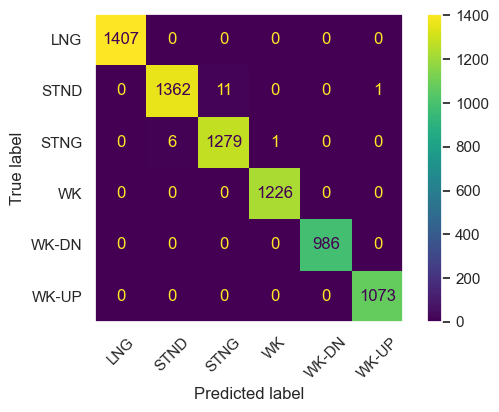

,precision,recall,f1-score,support
classes/agg,,,,
LNG,1.00000,1.00000,1.00000,1407
STND,0.99561,0.99127,0.99344,1374
STNG,0.99147,0.99456,0.99301,1286
WK,0.99919,1.00000,0.99959,1226
WK-DN,1.00000,1.00000,1.00000,986
WK-UP,0.99907,1.00000,0.99953,1073
accuracy,,,0.99742,7352
macro-avg,0.99756,0.99764,0.99760,7352
weighted-avg,0.99742,0.99742,0.99741,7352


In [553]:
rf_report_to_df = performance(result_rf, X_train_flat, y_train_input, digits=5)
dspl(rf_report_to_df)

Best estimator's performance on **test** data

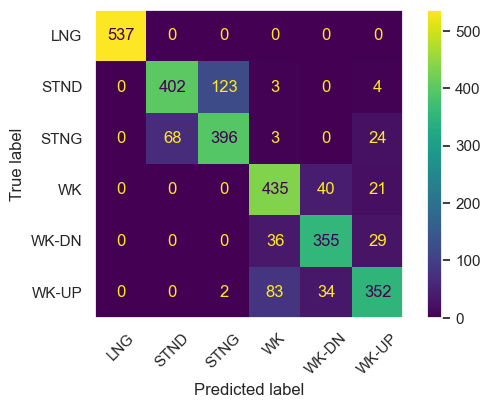

,precision,recall,f1-score,support
classes/agg,,,,
LNG,1.00000,1.00000,1.00000,537
STND,0.85532,0.75564,0.80240,532
STNG,0.76008,0.80652,0.78261,491
WK,0.77679,0.87702,0.82386,496
WK-DN,0.82751,0.84524,0.83628,420
WK-UP,0.81860,0.74735,0.78135,471
accuracy,,,0.84052,2947
macro-avg,0.83972,0.83863,0.83775,2947
weighted-avg,0.84276,0.84052,0.84019,2947


In [554]:
rf_report_to_df = performance(result_rf, X_test_flat, y_test_input, digits=5)
dspl(rf_report_to_df)

## References

- [Multiclass and multioutput algorithms](https://scikit-learn.org/stable/modules/multiclass.html)
- [linear_model.LogisticRegression().fit() source code](https://github.com/scikit-learn/scikit-learn/blob/9aaed4987/sklearn/linear_model/_logistic.py#L1140)
- [Encoding labels for multi-class problems in sckit-learn (SO)](https://stackoverflow.com/questions/51525043/encoding-labels-for-multi-class-problems-in-sckit-learn/51532590#51532590)
- [One hot encoding target variable in tree and non tree (knn) methods (SE)](https://datascience.stackexchange.com/questions/93252/one-hot-encoding-target-variable-in-tree-and-non-tree-knn-methods/93258#93258)
- [How to use multinomial logistic regression for multilabel classification problem (SO)](https://stackoverflow.com/questions/61977692/how-to-use-multinomial-logistic-regression-for-multilabel-classification-problem)
- [Encode multi-class response variable (SE)](https://datascience.stackexchange.com/a/87403)
- [1D Convolutional Neural Network Models for Human Activity Recognition](https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/)
- [A Gentle Introduction to Pooling Layers for Convolutional Neural Networks](https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/)
- [Python for Data Science and Machine Learning Bootcamp (Udemy)](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/)
- [Try RandomizedSearchCV if GridSearchCV is taking too long (Youtube)](https://www.youtube.com/watch?v=Q5dH5mOQ_ik)
- [Last-layer activation and loss function combinations](https://www.dlology.com/blog/how-to-choose-last-layer-activation-and-loss-function/)
- [Multi-Class Classification Tutorial with the Keras Deep Learning Library](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/)
- [Building a Linear Classifier with Tensorflow Keras](https://www.h2kinfosys.com/blog/linear-classifier-with-tensorflow-keras/)

- [Comprehensive Guide to Multiclass Classification Metrics](https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd)
- [Bar Plot in Matplotlib](https://www.geeksforgeeks.org/bar-plot-in-matplotlib/)